## About

This plot is a [waffle chart](/waffle-chart), with small mutliples. It shows the **recycling rates** per London borough. The size of each square is proportional to the recycling rate. The chart is made with the `pywaffle` library.

The chart was made by [Lisa Hornung](https://inside-numbers.com/). Thanks to her for accepting sharing her work here!

Let's see what the final picture will look like:

![small multiple waffle chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-waffle-with-small-multiples.png?raw=true)


## Libraries

First, you need to install the following librairies:

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- [pandas](https://python-graph-gallery.com/pandas/) is used to read the data
- [pywaffle](/waffle-chart) is used to create the waffle chart
- `flexitext`: to add beautiful annotations to the chart

And that's it!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
from flexitext import flexitext
from matplotlib import font_manager

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://www.react-graph-gallery.com). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.


In [3]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/london_recycling.csv"

df = pd.read_csv(url)
df.head()

,household_waste_recycled_dry_perc,household_waste_recycled_green_perc,household_waste_not_recycled_perc_est,Display_name
0,21.0,12.0,67.0,BAR
1,19.0,9.0,72.0,BRN
2,21.0,13.0,66.0,BRT
3,19.0,8.0,73.0,CMD
4,34.0,14.0,52.0,ELG


## Initialize parameters

Before creating the plot, we first need to define different elements:

- the layout of the small multiples


In [4]:
layout = [
    ["___","___","___","___","ENF","___","___","___"],
    ["___","___","HRW","BRN","HGY","WTH","___","___"],
    ["HDN","ELG","BRT","CMD","ISL","HCK","RDB","HVG"],
    ["HNS","HMS","KNS","WST","CTY","TOW","NWM","BAR"],
    ["___","RCH","WNS","LAM","SWR","LSH","GRN","BXL"],
    ["___","___","KNG","MRT","CRD","BRM","___","___"],
    ["___","___","___","STN","___","___","___","___"],
]

- the font: remember to change `my_path` value to the path of the font on your computer. You can learn more about font management [in this post](/custom-fonts-in-matplotlib)


In [5]:
# load fonts
my_path = '/Users/josephbarbier/Library/Fonts'
label_font = font_manager.FontProperties(fname=f'{my_path}/Roboto-Medium.ttf')
title_font = font_manager.FontProperties(fname=f'{my_path}/LilitaOne-Regular.ttf')

- a color mapping


In [7]:
colors = {
   "dry": "#22A2AA",
   "green": "#81CE9C",
   "none": "#fbfaf9",
   "value": "#0B4465",
   "bg": "#fbfaf9"
}

We can now develop the plot! The main step is to generate a **figure with a grid of subplots**. After that, we iterate through each axis to construct a waffle chart.


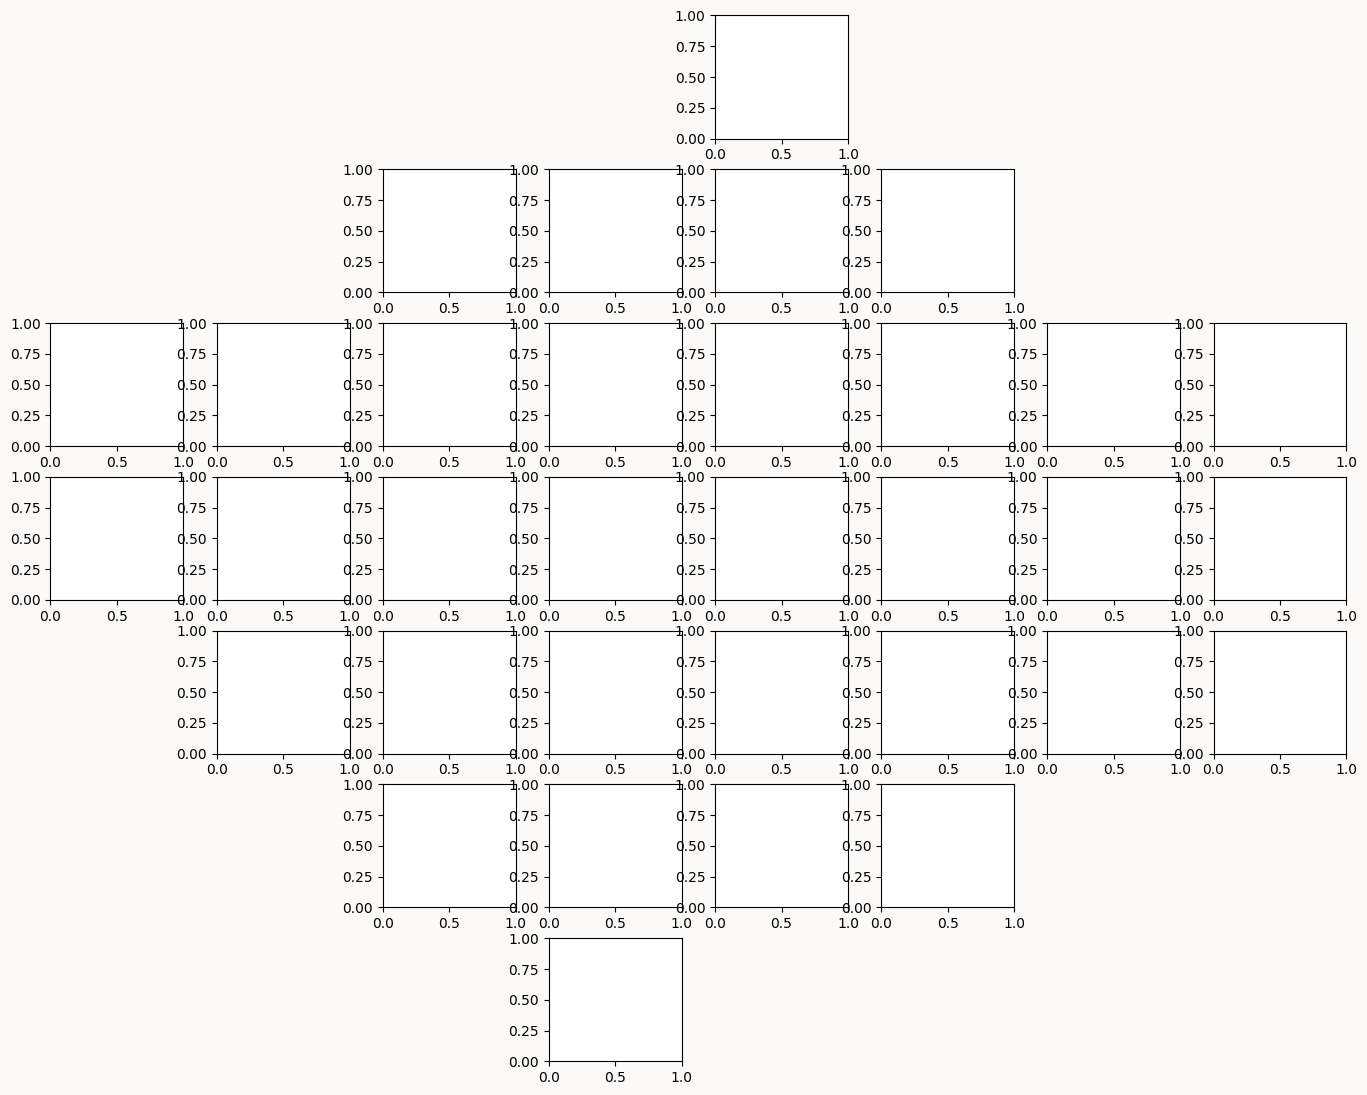

In [8]:
# layout
scale_factor = 1.8
fig, axs = plt.subplot_mosaic(layout, figsize=(8*scale_factor,7*scale_factor), empty_sentinel="___")
plt.subplots_adjust(wspace=0.25, hspace=0.25, left=0.05, right=0.95, bottom=0.05)
fig.set_facecolor(colors["bg"])

plt.show()

We easily recognize the shape of the layout defined above!


## Fill the grid

Once the grid is created, we can fill it with the [waffle charts](/waffle-chart). We **iterate through each axis** to create a [waffle chart](/waffle-chart). We use the `pywaffle` library to create the [waffle chart](/waffle-chart). We also add a title to each subplot.


In [ ]:
# setup
columns =  [
    'household_waste_recycled_dry_perc',
    'household_waste_recycled_green_perc',
    'household_waste_not_recycled_perc_est'
]

# layout
scale_factor = 1.8
fig, axs = plt.subplot_mosaic(layout, figsize=(8*scale_factor,7*scale_factor), empty_sentinel="___")
plt.subplots_adjust(wspace=0.25, hspace=0.25, left=0.05, right=0.95, bottom=0.05)
fig.set_facecolor(colors["bg"])

# plot data
for ax in axs:
    data_filtered = df[df["Display_name"]==ax]
    y_values = data_filtered[columns].values.tolist()[0]
    Waffle.make_waffle(
        ax=axs[ax],
        rows=10,
        values=y_values,
        colors=[colors["dry"],
        colors["green"],
        colors["none"]],
        interval_ratio_x=0.35,
        interval_ratio_y=0.35,
        vertical=True,
        zorder=1
    )

    #display % value and borough
    axs[ax].text(
        0.95,
        0.8,
        str(int(y_values[0] + y_values[1]))+"%",
        ha="right",
        va='top',
        fontsize=20,
        color=colors["value"],
        fontproperties=title_font
    )
    axs[ax].text(
        0.95,
        0.95,
        ax,
        fontsize=10,
        ha="right",
        va='top',
        color=colors["value"],
        zorder=3,
        fontproperties=label_font
    )

# title and footer
fig.text(
    0.5,
    1,
    "Recycling rates by London borough",
    fontsize=38,
    ha='center',
    va="top",
    fontweight="bold",
    fontproperties=title_font,
    color=colors["value"]
)
fig.text(
    0.7,
    0.055,
    "Source: Defra",
    fontsize=11,
    ha='right',
    va="center",
    fontweight="normal",
    fontproperties=label_font,
    linespacing=1.5, color="black"
)
subtitle = (
    "<size:20>% of household waste sent for "
    "<color:#22A2AA, weight:bold>DRY</> or <color:#81CE9C, weight:bold>GREEN</> recycling, 2022/23</>"
)
flexitext(0.5, 1-0.075, subtitle, va="bottom", ha="center", xycoords="figure fraction")

plt.savefig("../../static/graph/web-waffle-with-small-multiples.png", dpi=300)
plt.show()

## Going further

This article explains how to reproduce a [small multiple waffle chart](/waffle-chart) with annotations, colormap and nice other features.

You might be interested in:

- the [waffle chart section](/waffle-chart) of the gallery
